# Support Vector Machines for Linear and non-Linear Classification Tasks

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load and Explore the Dataset
Load the Breast Cancer dataset from sklearn and perform exploratory data analysis.

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

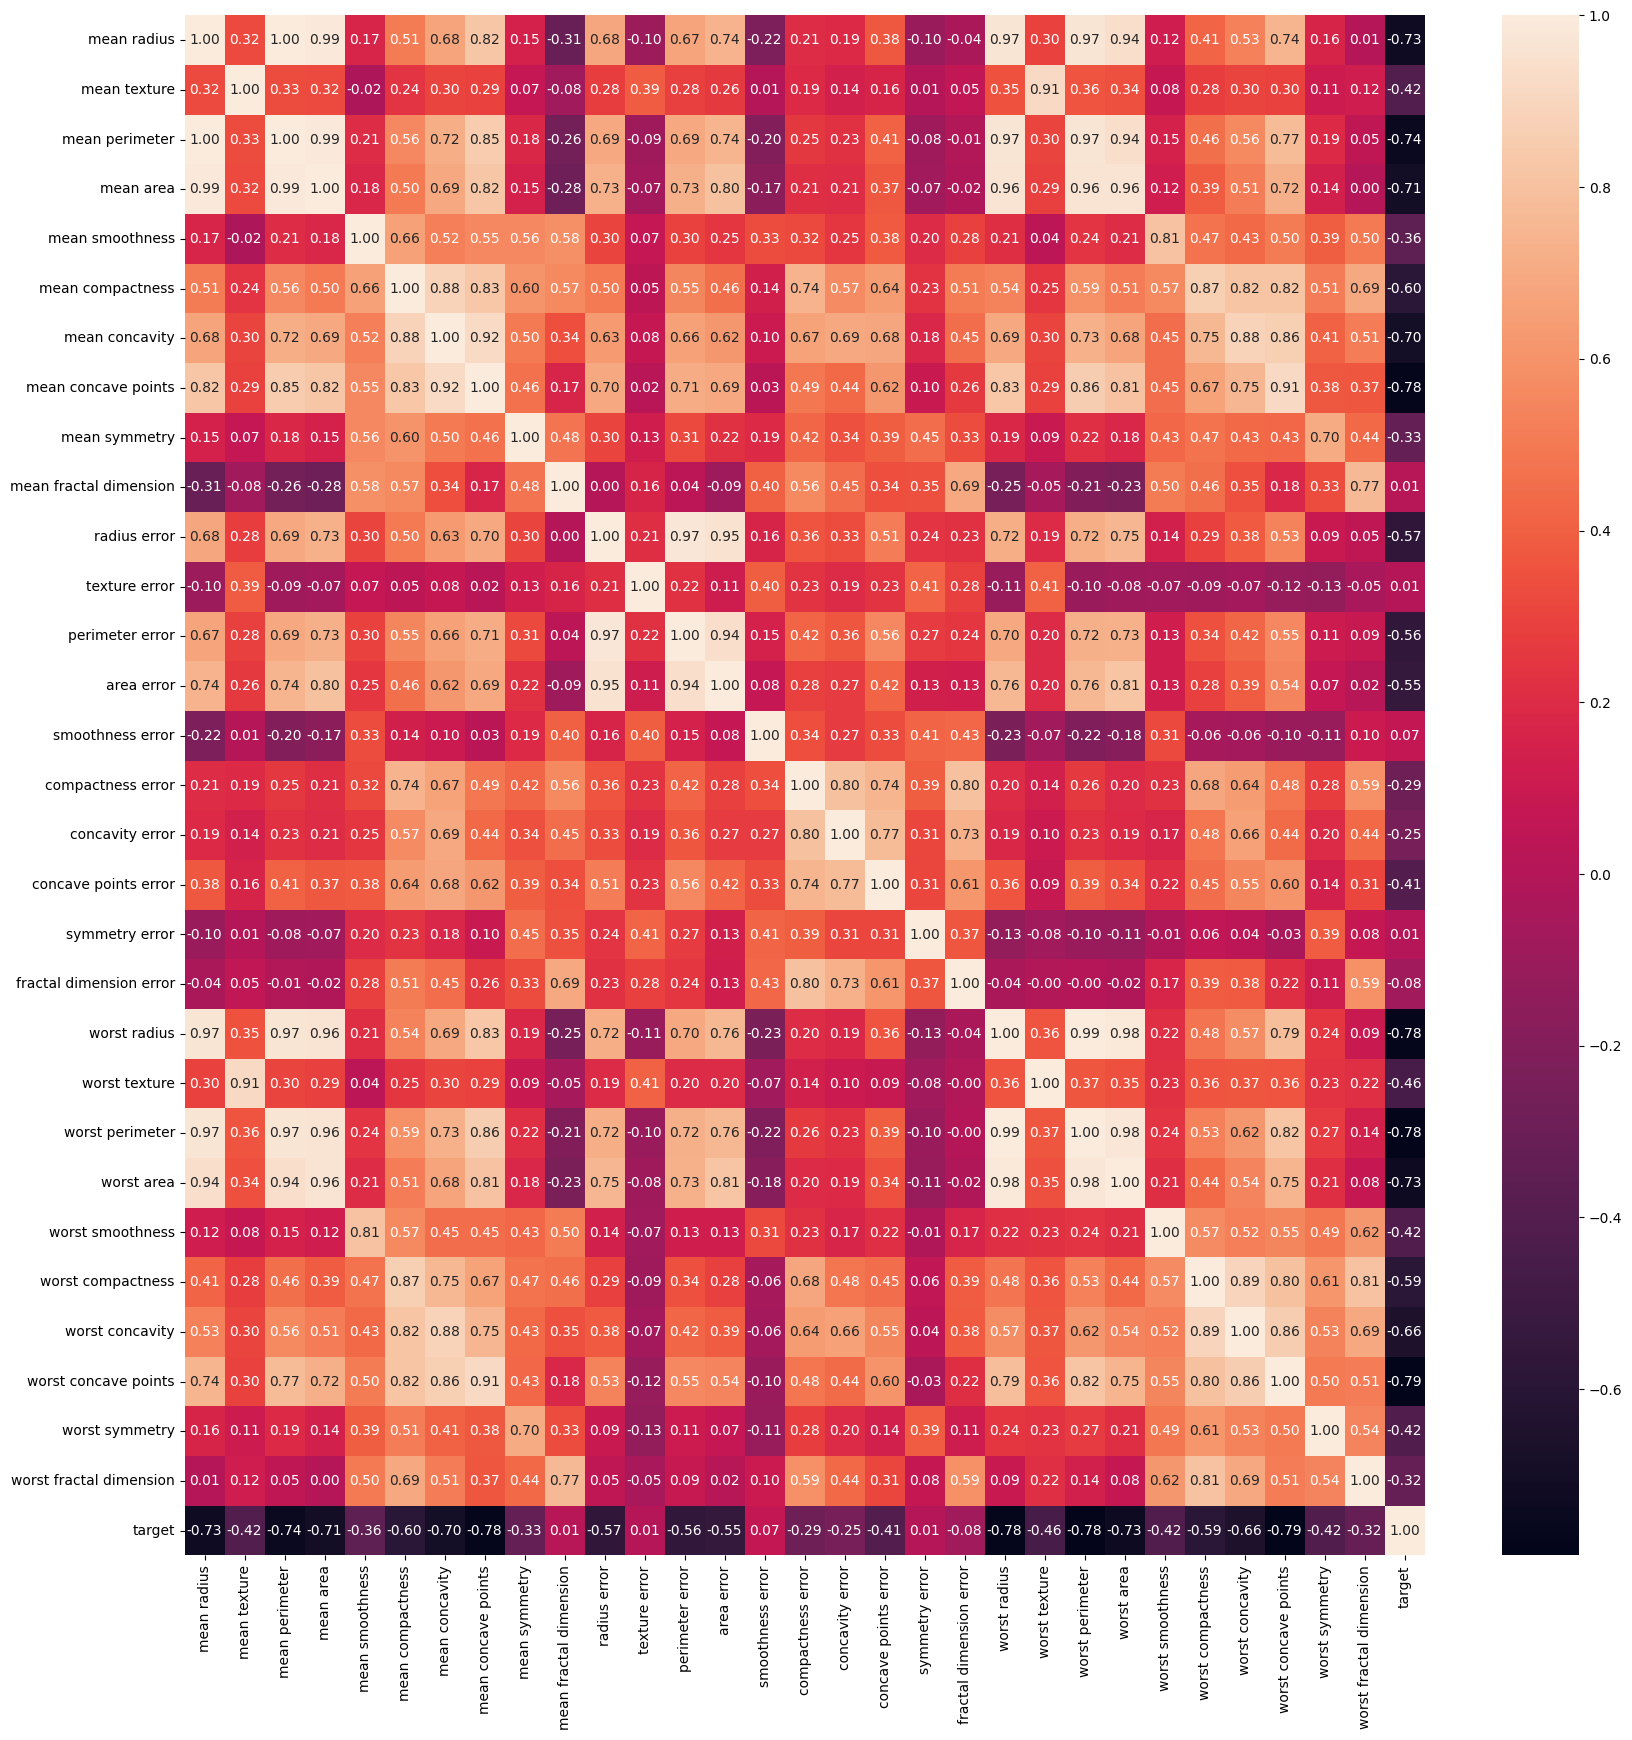

In [2]:
# Load and Explore the Dataset
# Load the Breast Cancer dataset from sklearn
cancer = datasets.load_breast_cancer()

# Convert the dataset to a pandas DataFrame
df = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns=np.append(cancer['feature_names'], ['target']))

# Display the first few rows of the DataFrame
print(df.head())

# Display the summary statistics of the DataFrame
print(df.describe())

# Display the distribution of the target variable
print(df['target'].value_counts())

# Plot the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

# Preprocess the Data
Preprocess the data by handling missing values, encoding categorical variables, and splitting the data into training and testing sets.

In [3]:
# Preprocess the Data
# Check for missing values
print(df.isnull().sum())

# Since there are no missing values, we don't need to handle them

# The dataset only contains numerical variables, so we don't need to encode any categorical variables

# Split the data into features and target
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape (X): ", X_train.shape)
print("Training set shape (y): ", y_train.shape)
print("Testing set shape (X): ", X_test.shape)
print("Testing set shape (y): ", y_test.shape)

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64
Training set shape (X):  (455, 30)
Training set shape (y):  (455,)
Testing set shape (X)

# Train the SVM with Different Kernels
Train the Support Vector Machine model with different kernel functions and parameter values for linearly separable and non-linearly separable classification tasks.

In [4]:
# Define the SVM models with different kernels
svm_linear = svm.SVC(kernel='linear')
svm_poly = svm.SVC(kernel='poly')
svm_rbf = svm.SVC(kernel='rbf')

# Train the SVM models
svm_linear.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

# Print the training scores
print("Linear SVM Training score: ", svm_linear.score(X_train, y_train))
print("Polynomial SVM Training score: ", svm_poly.score(X_train, y_train))
print("RBF SVM Training score: ", svm_rbf.score(X_train, y_train))

# Print the testing scores
print("Linear SVM Testing score: ", svm_linear.score(X_test, y_test))
print("Polynomial SVM Testing score: ", svm_poly.score(X_test, y_test))
print("RBF SVM Testing score: ", svm_rbf.score(X_test, y_test))

Linear SVM Training score:  0.9692307692307692
Polynomial SVM Training score:  0.9010989010989011
RBF SVM Training score:  0.9142857142857143
Linear SVM Testing score:  0.956140350877193
Polynomial SVM Testing score:  0.9473684210526315
RBF SVM Testing score:  0.9473684210526315


# Evaluate the Model
Evaluate the performance of the model using various metrics such as accuracy, precision, recall, and F1 score.

Linear SVM Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.91      0.94        43
         1.0       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Polynomial SVM Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.86      0.92        43
         1.0       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

RBF SVM Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.86      0.92        43
         1.0       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.9

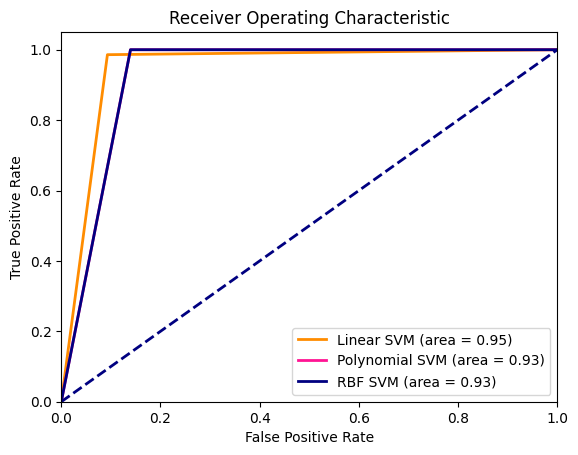

In [5]:
# Predict the target values using the trained models
y_pred_linear = svm_linear.predict(X_test)
y_pred_poly = svm_poly.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

# Print the classification reports
print("Linear SVM Classification Report:\n", classification_report(y_test, y_pred_linear))
print("Polynomial SVM Classification Report:\n", classification_report(y_test, y_pred_poly))
print("RBF SVM Classification Report:\n", classification_report(y_test, y_pred_rbf))

# Print the confusion matrices
print("Linear SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))
print("Polynomial SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_poly))
print("RBF SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))

# Compute the ROC curves and AUC scores
fpr_linear, tpr_linear, _ = roc_curve(y_test, y_pred_linear)
roc_auc_linear = auc(fpr_linear, tpr_linear)

fpr_poly, tpr_poly, _ = roc_curve(y_test, y_pred_poly)
roc_auc_poly = auc(fpr_poly, tpr_poly)

fpr_rbf, tpr_rbf, _ = roc_curve(y_test, y_pred_rbf)
roc_auc_rbf = auc(fpr_rbf, tpr_rbf)

# Plot the ROC curves
plt.figure()
plt.plot(fpr_linear, tpr_linear, color='darkorange', lw=2, label='Linear SVM (area = %0.2f)' % roc_auc_linear)
plt.plot(fpr_poly, tpr_poly, color='deeppink', lw=2, label='Polynomial SVM (area = %0.2f)' % roc_auc_poly)
plt.plot(fpr_rbf, tpr_rbf, color='navy', lw=2, label='RBF SVM (area = %0.2f)' % roc_auc_rbf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot Confusion Matrix
Plot the confusion matrix to visualize the performance of the model.

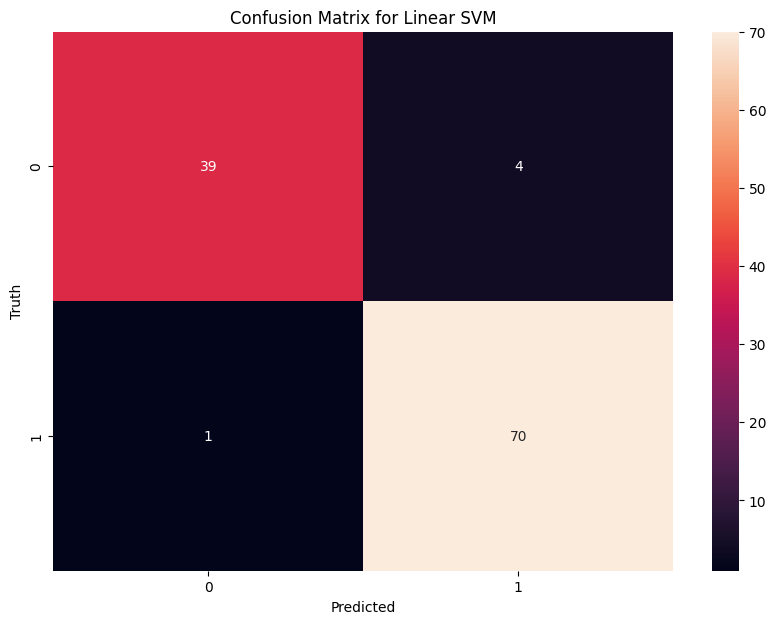

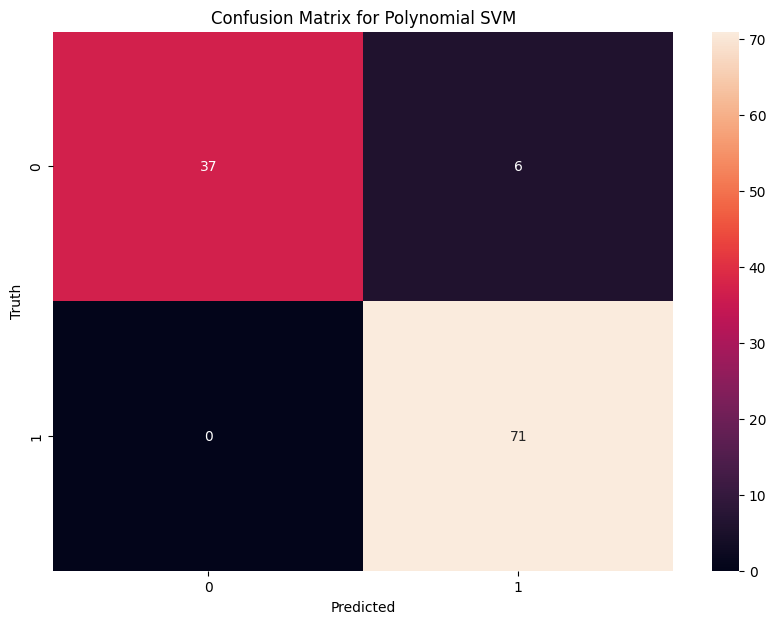

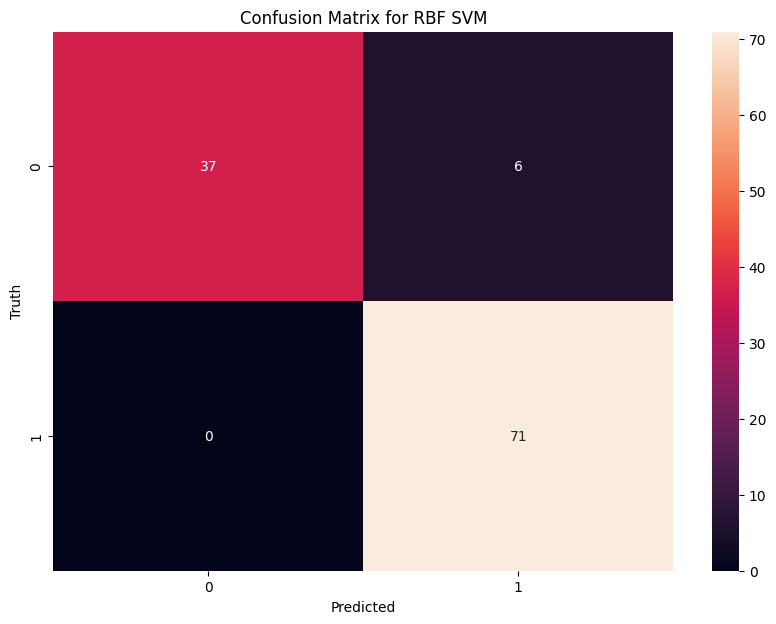

In [11]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True)
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.show()